<a href="https://colab.research.google.com/github/Abkhenaten/Projects/blob/master/Text_data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset to be used is a CSV file named wine_reviews.csv, which contains data on wine reviews.

In [44]:
#Load packages
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
#Set pnads columns to display at max width.
pd.set_option('display.max_colwidth', None)

#Set seaborn aesthetic features.
sns.set()

In [46]:
#Read and assign dataset to dataframe 'wine_df'
wine_df = pd.read_csv('https://github.com/datacamp/working-with-text-data-in-python-live-training/blob/master/data/wine_reviews.csv?raw=true')

#View the first few rows.
wine_df.head()

,country,description,designation,points,price,province,region,variety,winery
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet sauvignon,Heitz
1,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.",Special Selected Late Harvest,96,90.0,California,Knights Valley,sauvignon blanc,Macauley
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,PINOT NOIR,Ponzi
3,US,"This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine to cellar, though it is already quite enjoyable. Drink now through 2030.",Silice,95,65.0,Oregon,Chehalem Mountains,Pinot noir,Bergström
4,US,"The producer sources from two blocks of the vineyard for this wine—one at a high elevation, which contributes bright acidity. Crunchy cranberry, pomegranate and orange peel flavors surround silky, succulent layers of texture that present as fleshy fruit. That delicately lush flavor has considerable length.",Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Pinot noir,Blue Farm


In [47]:
#Display information of Dataframe
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      4131 non-null   object 
 1   description  4131 non-null   object 
 2   designation  2792 non-null   object 
 3   points       4131 non-null   int64  
 4   price        4131 non-null   float64
 5   province     4131 non-null   object 
 6   region       4131 non-null   object 
 7   variety      4131 non-null   object 
 8   winery       4131 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 290.6+ KB


Observation: The two numeric columns, points and price, are correctly specified as integers and floats. However, it appears as though there are a lot of missing values for the designation column, which specifies what winery the wine originated from.

In [48]:
#Check variety column, sort alphabetically, and select unique values
wine_df['variety'].sort_values().unique()

array([' BORDEAUX-STYLE RED BLEND', ' Bordeaux-style red blend',
       ' CABERNET SAUVIGNON', ' CHARDONNAY', ' Cabernet sauvignon',
       ' Chardonnay', ' MERLOT', ' Merlot', ' PINOT NOIR', ' Pinot noir',
       ' RED BLEND', ' RIESLING', ' Red blend', ' Riesling',
       ' SAUVIGNON BLANC', ' SYRAH', ' Sauvignon blanc', ' Syrah',
       ' bordeaux-style red blend', ' cabernet sauvignon', ' chardonnay',
       ' merlot', ' pinot noir', ' red blend', ' riesling',
       ' sauvignon blanc', ' syrah', 'BORDEAUX-STYLE  RED  BLEND',
       'BORDEAUX-STYLE RED BLEND', 'BORDEAUX-STYLE RED BLEND ',
       'Bordeaux-style  red  blend', 'Bordeaux-style red blend',
       'Bordeaux-style red blend ', 'CABERNET  SAUVIGNON',
       'CABERNET SAUVIGNON', 'CABERNET SAUVIGNON ', 'CHARDONNAY',
       'CHARDONNAY ', 'Cabernet  sauvignon', 'Cabernet sauvignon',
       'Cabernet sauvignon ', 'Chardonnay', 'Chardonnay ', 'MERLOT',
       'MERLOT ', 'Merlot', 'Merlot ', 'PINOT  NOIR', 'PINOT NOIR',
      

Observation: Due to extra spaces and inconsistencies in case, there are many duplicate entries of wine varieties that we will be addressed during cleaning.

In [49]:
#String concatenation. Join 'the' and 'winery' and separate by adding " ".
x = 'winery'
y = 'the'
#Combine x and y separated by " ".
y + ' ' + x

'the winery'

In [50]:
#Fill designation column with name of winery and 'unknown'.
wine_df['designation'].fillna(wine_df['winery'] + ' - unknown', inplace=True)

#See the result.
wine_df.sample(5)


,country,description,designation,points,price,province,region,variety,winery
4026,US,"Strong, caramelized oak stars in this dry, rather one-dimensional Cabernet. Despite some black currant, anise and mocha flavors, it's like drinking toothpicks.",Winemaker's Reserve,84,40.0,California,Alexander Valley,cabernet sauvignon,Souverain
776,US,"This bottling from McMurray Vineyard at Rancho Sisquoc packs all of the beloved Syrah characteristics: ripe plum, blackberry and blueberry fruit, a vanilla-laced oaky frame and underlying hints of lavender and pepper. The palate offers herb and pepper touches, underscoring its black fruit and caramel flavors.",Upper Crust,92,35.0,California,Santa Maria Valley,Syrah,Babcock
2701,US,"The Legacy estate reserve sources the original mid-1970s vines. It's a delicate, high-wire act, balanced on a bed of rose petals. From the floral aromatics into flavors of red currant and black cherry, it takes you on a well-modulated joyride. Veins of anise, cola and clay add complexity, as the details expand into a lingering finish. Drink 2015–2030.",Winderlea Legacy,94,75.0,Oregon,Dundee Hills,Pinot noir,Winderlea
3885,US,"Despite the excellent vintage, this seems more tannic than ripe. The fruit is simple and leafy, with tea flavors and a chalky finish.",Wooldridge Creek Vineyard,86,35.0,Oregon,Applegate Valley,Merlot,Soléna
2980,US,"This is a very friendly wine that is medium bodied, has a brownish tint to the color, slightly earthy aromas, warm fruit flavors like cooked cherries and a touch of brown sugar, plus a mellow lightly tannic texture.",Durate-Georgetown Vineyard,87,30.0,California,Sierra Foothills,pinot noir,Easton


In [51]:
#Re-run .info() to ensure no missing values are left
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      4131 non-null   object 
 1   description  4131 non-null   object 
 2   designation  4131 non-null   object 
 3   points       4131 non-null   int64  
 4   price        4131 non-null   float64
 5   province     4131 non-null   object 
 6   region       4131 non-null   object 
 7   variety      4131 non-null   object 
 8   winery       4131 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 290.6+ KB


Observation: Currently, there are a number of location attributes scattered across columns. While it is useful to have them separately, we will create a column that combines this data into a location column.

We are taking the first three characters of the country name, and then combine them with the region.

In [52]:
#Create location column and assign to region, hyphen, and 1st 2 characters of country
# in upper case.
wine_df['location'] = wine_df['region']+ ' - ' + wine_df['country'].str[0:3].str.upper()
#Check data with random sample
wine_df.sample(5)

,country,description,designation,points,price,province,region,variety,winery,location
3490,US,"Another of the single-vineyard Pinots from Brooks, this offers spicy cherry, chocolaty raisins, and dusty tannins. It penetrates and lingers, showing a lot of baking spices from its 18 months in French oak. There's a lick of sea salt caramel wrapping up the finish.",Crannell,91,48.0,Oregon,Eola-Amity Hills,pinot noir,Brooks,Eola-Amity Hills - US
232,Italy,"This blend of Cabernet Sauvignon, Cabernet Franc and Merlot opens with aromas of bluish-black fruit, toasted oak, espresso and licorice. The palate delivers blackberry extract, anise, clove and tobacco while dusty tannins provide support.",Carmione,89,30.0,Tuscany,Toscana,red blend,Pratesi,Toscana - ITA
1289,US,"Tight and fresh aromas of Asian pear, honeysuckle and key lime pie converge on this sparkler from a new estate in Temecula. The palate shows sliced apples, yellow pears, ripe nectarine, rounder white peach and even creamy cherimoya flavors. Though the region is known more for almond-flavored sparklers, they seem to do regular bubbles well.",Blanc de Blanc,89,32.0,California,South Coast,Chardonnay,Carter Estate,South Coast - US
3403,US,"The dryness and low alcohol are praiseworthy, but more challenging are hard tannins and biting acidity. With blackberry and sweet green-herb flavors, it's the opposite of today's ripe cult style, but by no means unattractive.",Donati - unknown,86,25.0,California,Paicines,Cabernet sauvignon,Donati,Paicines - US
2146,Argentina,"This light and refreshing SB offers mild apple and citrus aromas, a snappy, citric palate and basic flavors of green apple and lime. As a whole, it's a cleansing but fairly standard wine.",Altosur,84,12.0,Mendoza Province,Tupungato,Sauvignon blanc,Finca Sophenia,Tupungato - ARG


Observation: The variety column needs some work. Use string functions provided by pandas to set the varieties to lowercase, strip leading and trailing spaces, and replace any double spaces with single spaces.

In [53]:
#Remove leading and trailing spaces.
wine_df['variety'] = wine_df['variety'].str.strip()
#Set names to lower case.
wine_df['variety'] = wine_df['variety'].str.lower()
#Replace double spaces with single spaces.
wine_df['variety'] = wine_df['variety'].str.replace('  ', ' ', regex=False)
#Check the list
wine_df['variety'].sort_values().unique()


array(['bordeaux-style red blend', 'cabernet sauvignon', 'chardonnay',
       'merlot', 'pinot noir', 'red blend', 'riesling', 'sauvignon blanc',
       'syrah'], dtype=object)

Data Visualization

In [54]:
#Assign built-in set of STOPWORDS to a variable.
stopwords = STOPWORDS
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'drink',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'flavor',
 'flavors',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'now',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 '

In [55]:
#Join all reviews by a space and lowercase.
text = ' '.join(wine_df['description']).lower()
#Preview first 2000 characters
text[:2000]

"this tremendous 100% varietal wine hails from oakville and was aged over three years in oak. juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. enjoy 2022–2030. mac watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/l of residual sugar. this spent 20 months in 30% new french oak, and incorporates fruit from ponzi's aurora, abetina and madrona vineyards, among others. aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso.

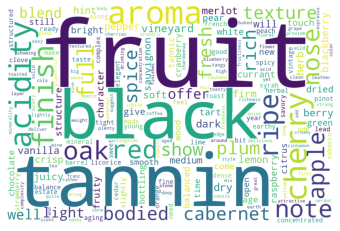

In [56]:
#Generating a wordcloud
wordcloud = WordCloud(
    collocations=False,
    width=1200, height=800,
    background_color='white',
    stopwords=stopwords)

wordcloud.generate(text)

#Display
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

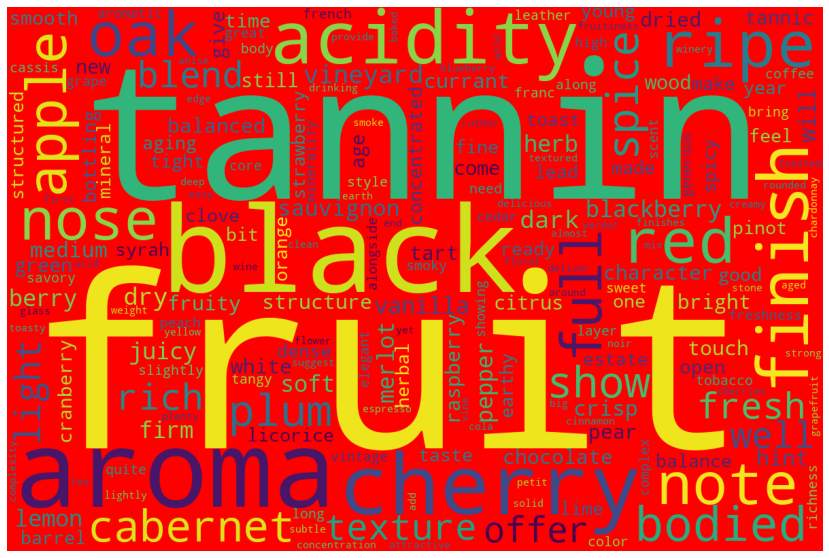

In [57]:
#Updating stopwords by eliminating some words.
stopwords.update(['flavor','flavors', 'wine', 'drink', 'palate', 'now',])

#Generate wordcloud with different background.
wordcloud = WordCloud(
    collocations=False,
    width=1200, height=800,
    background_color='red',
    stopwords=stopwords)

wordcloud.generate(text)
#Display
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Frequency count of words outside of wordcloud.

In [58]:
#Tokenize existing set of text.
tokens = [word for word in word_tokenize(text) if word.isalpha()]
                                         
#Filtering list for words that aren't in existing set of stopwords.
final_words = [word for word in tokens if word not in stopwords]

#Preview list
final_words[:10]

['tremendous',
 'varietal',
 'hails',
 'oakville',
 'aged',
 'three',
 'years',
 'oak',
 'juicy',
 'fruit']

In [59]:
#Use counter to create a count of each word in filtered list
word_count = Counter(final_words)

#Use loop to print 10 most common tokens
for word in word_count.most_common(10):
  print(word[0] + ": " + str(word[1]) + " mentions")

fruit: 1535 mentions
black: 1167 mentions
tannins: 1154 mentions
aromas: 1106 mentions
acidity: 1030 mentions
cherry: 984 mentions
finish: 927 mentions
ripe: 808 mentions
oak: 698 mentions
red: 643 mentions


In [60]:
#Check word count for variants of words
print(word_count['tannin'])
print(word_count['tannins'])

118
1154


Count could be more accurate, nearly identical words are included.
We will use lemmatization, because it relies upon linguistic rules to reduce input to its root word, or lemma. 

In [61]:
from nltk.stem import PorterStemmer

#Initialize stemmer
stemmer = PorterStemmer()

#Generate list for test_words
test_words = ['bike', 'bikes', 'biking']
#Generate a list of new words
new_words = ['run', 'runner', 'running']

#View the stemmer in action
print([stemmer.stem(word) for word in test_words])

['bike', 'bike', 'bike']


We can see the limits of the stemmer


Lematization 
An approach that relies upon linguistic rules, which attemps to reduce input to its root word, or lemma. Unlike the algorithmic approach of stemming, lemmatization uses a corpus to ensure that the root word is an actual word. 

In [62]:
from nltk.stem import WordNetLemmatizer 
# Ininitalize our stemmer
lemmatizer = WordNetLemmatizer()

# View the stemmer in action
print([lemmatizer.lemmatize(word) for word in test_words])
print([lemmatizer.lemmatize(word) for word in new_words])

['bike', 'bike', 'biking']
['run', 'runner', 'running']


In [63]:
#Lemmatize list
lemmatized_words = [lemmatizer.lemmatize(word) for word in final_words]

#Create count of each word.
new_word_count = Counter(lemmatized_words)

#Check for correct lemmatization
print('Old count of tannin: ' +str(word_count.get('tannin')))
print('New count of tannin: ' + str(new_word_count.get('tannin')))
print('New count of tannins: ' +str(new_word_count.get('tannins')))

Old count of tannin: 118
New count of tannin: 1272
New count of tannins: None


In [64]:
#Convert most common words to a DataFrame for plotting.
word_freq = pd.DataFrame(new_word_count.most_common(15), index=None, columns=['Word', 'Count'])

#View first five rows
word_freq.head(5)


,Word,Count
0,fruit,2037
1,tannin,1272
2,black,1167
3,aroma,1155
4,cherry,1112


Text(0.5, 1.0, 'Most common words')

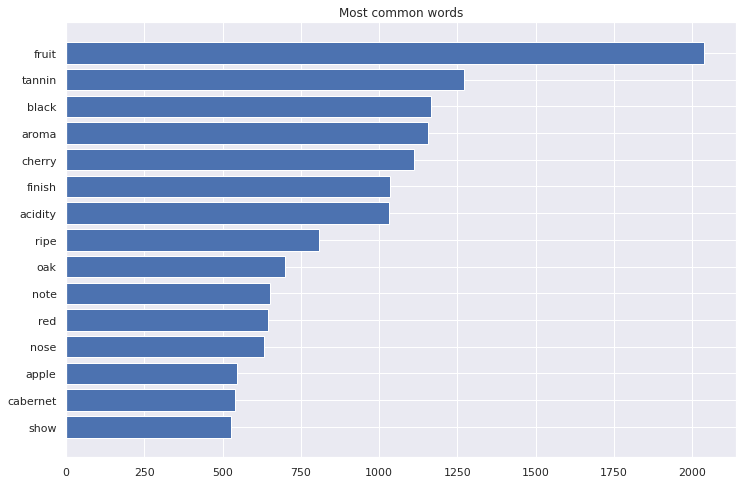

In [65]:
# Set figure size
plt.figure(figsize=(12, 8))

#Create barplot with values
plt.barh(y=word_freq.Word, width=word_freq.Count)

#Invert y axis
plt.gca().invert_yaxis()

#Set the title and show
plt.title('Most common words')

In [66]:
#Searching for specific strings
#Create Boolean filter
oak_filter = wine_df['description'].str.contains('oak', case=False, regex=False)

#Filter our DataFrame using oak_filter and look at the first five rows.
wine_df[oak_filter][0:5]

,country,description,designation,points,price,province,region,variety,winery,location
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,cabernet sauvignon,Heitz,Napa Valley - US
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
9,US,"This blockbuster, powerhouse of a wine suggests blueberry pie and chocolate as it opens in the glass. On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery oak seasonings amidst its dense richness. It finishes with finesse and spice.",Rainin Vineyard,95,325.0,California,Diamond Mountain District,cabernet sauvignon,Hall,Diamond Mountain District - US
14,US,"Focused and dense, this intense wine captures the essence of ripe raspberries. Aged in 50% new French oak, it's got a strong vein of coffee and mocha. The flavors broaden out and penetrate, finishing with highlights of cedar, cinnamon and dark chocolate. Drink now through the 2020s, but decant if you want the full expression.",Abetina,94,105.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
17,US,"Steely and perfumed, this wine sees only 20% new French oak, remaining vibrantly fresh. Baked apple and lemon pith veer into grapefruit on the palate, with spiciness to the finish that's both brash and loud.",Babushka,90,37.0,California,Russian River Valley,chardonnay,Zepaltas,Russian River Valley - US


Regular Expressions



In [67]:
#Create test string
test_string = """
This tremendous 100% varietal wine hails from Oakville 
and was aged over three years in oak. Juicy red-cherry fruit 
and a compelling hint of caramel greet the palate, framed by elegant, 
fine tannins and a subtle 20% minty tone in the background. 
Balanced and rewarding from start to finish, 
it has years ahead of it to develop further nuance. There are absolutely no
bad tannins in this wine. But there is a tasty tannin.
Enjoy 2022–2030.
"""

#Find all digits in this review
re.findall(r"\d", test_string)

['1', '0', '0', '2', '0', '2', '0', '2', '2', '2', '0', '3', '0']

In [68]:
#Find all years represented in the format XXXX 
re.findall(r"\d\d\d\d", test_string)

['2022', '2030']

In [69]:
#Find all percentages (with between 1 and 3 digits, followed by a percentage sign)
re.findall(r'\d{1,3}%', test_string)

['100%', '20%']

In [70]:
#Find all mentions of tannin (or tannins), as well as the word that
re.findall(r'\w+\stannins?', test_string)

['fine tannins', 'bad tannins', 'tasty tannin']

In [71]:
#Test out the pattern
print(re.search(r'(\s|^)oak', 'oaky flavors'))
print(re.search(r'(\s|^)oak', 'flavored oak'))
print(re.search(r'(\s|^)oak', 'cloak'))

<_sre.SRE_Match object; span=(0, 3), match='oak'>
<_sre.SRE_Match object; span=(8, 12), match=' oak'>
None


In [72]:
#Search for capitalized or non-capitalized 'o'
print(re.search(r'[Oo]ak', 'Oak'))
print(re.search(r'[Oo]ak', 'oak'))

<_sre.SRE_Match object; span=(0, 3), match='Oak'>
<_sre.SRE_Match object; span=(0, 3), match='oak'>


In [73]:
#Allow for variants of oakiness, and then use an indicator that it's the end of the word.
# Search for a white space, 
    # followed by any case 'o', 'ak', 
    # and ending in 'iness', 'y', or a period, comma, or whitespace.
oak_pattern = r'(\s|^)[Oo]ak(iness|y|s)?[/.,\s]'

Putting the pieces together, we now have a pattern that will capture all references to oak that we expect to find, while also not matching with words like 'Oakville'. Let's add these together, and then assign them to the variable oak_pattern.

In [74]:
#Testing the pattern

#Use pattern to search a string that contains Oakville but not explicitly oak
x = re.search(oak_pattern, "This tremendous 100% varietal wine hails from Oakville.")

#Let us know if match is found
if x:
  print('Yes, an oak match!')
else:
  print('No oak match.')

No oak match.


In [75]:
# Use our pattern to search a string that contains a reference to something being 'oaky'
x = re.search(oak_pattern, 'This tremendous wine is oaky.')

#Inform if match is found.
if x:
  print('Yes, an oak match!')
else:
  print('No oak match.')

Yes, an oak match!


In [76]:
#View the match
x[0]

' oaky.'

Filtering the DataFrame using regex to find interesting patterns.
Now that we have a functioning pattern, we can use it to gain insights about the oakiness of wines. First, we use our pattern to filter the DataFrame, again using str.contains(), but this time using a regular expression.

We can assign this filtered DataFrame to a new one, titled oak_wines, which we can use for further analyses. 

In [77]:
#Filter our DataFrame for descriptions matching our pattern, and assign to oak_wines
oak_wines = wine_df[wine_df['description'].str.contains(oak_pattern)]

#View the first few rows
oak_wines.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,country,description,designation,points,price,province,region,variety,winery,location
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,cabernet sauvignon,Heitz,Napa Valley - US
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
9,US,"This blockbuster, powerhouse of a wine suggests blueberry pie and chocolate as it opens in the glass. On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery oak seasonings amidst its dense richness. It finishes with finesse and spice.",Rainin Vineyard,95,325.0,California,Diamond Mountain District,cabernet sauvignon,Hall,Diamond Mountain District - US
14,US,"Focused and dense, this intense wine captures the essence of ripe raspberries. Aged in 50% new French oak, it's got a strong vein of coffee and mocha. The flavors broaden out and penetrate, finishing with highlights of cedar, cinnamon and dark chocolate. Drink now through the 2020s, but decant if you want the full expression.",Abetina,94,105.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
17,US,"Steely and perfumed, this wine sees only 20% new French oak, remaining vibrantly fresh. Baked apple and lemon pith veer into grapefruit on the palate, with spiciness to the finish that's both brash and loud.",Babushka,90,37.0,California,Russian River Valley,chardonnay,Zepaltas,Russian River Valley - US


Let's start to get an idea of the ratios of oakiness between varieties of wines. Let's start by grouping our two DataFrames, oak_wines and wine_df by the variety and counting the number of references.

In [78]:
#Group oak DataFrame by variety, count it and sort the index.
oak_grouped = oak_wines.groupby('variety').count()['country'].sort_index(ascending=False)

#Group original DataFrame by variety, count it, and sort the index
wine_grouped = wine_df.groupby('variety').count()['country'].sort_index(ascending=False)

#Display the DataFrames
print(oak_grouped)
print(wine_grouped)

variety
syrah                        28
sauvignon blanc              23
riesling                      5
red blend                    97
pinot noir                  172
merlot                       36
chardonnay                  176
cabernet sauvignon          165
bordeaux-style red blend     21
Name: country, dtype: int64
variety
syrah                        237
sauvignon blanc              291
riesling                     202
red blend                    536
pinot noir                  1033
merlot                       149
chardonnay                   696
cabernet sauvignon           527
bordeaux-style red blend     460
Name: country, dtype: int64


Plot the ratios.
 By overlaying the oak_grouped data over the wine_grouped data, we can get a rough visualization of the ratios of oaky wines. To do this, we will use matplotlib.pyplot.barh to make two horizontal barplots.

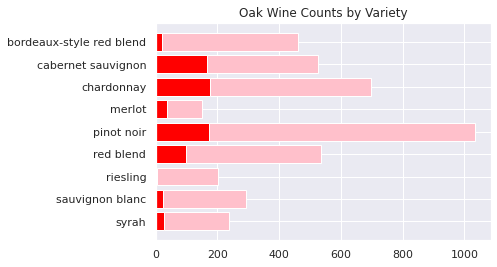

In [79]:
#Plot a horizontal bar chart of the count of varieties in 'pink'
plt.barh(wine_grouped.index.values, wine_grouped, color= 'pink')

#Plot a horizontal bar chart of the count of oaky varieties in 'red'
plt.barh(oak_grouped.index.values, oak_grouped, color='red')

#Title
plt.title('Oak Wine Counts by Variety')

#Show the plot
plt.show()

Calculate ratios.
Create a Boolean (True/False) column called 'oaky' using our pattern, and then use a groupby() to calculate the percentage of each variety that is described as oaky.

In [80]:
#Generate a new Boolean column.
wine_df['oaky'] = wine_df['description'].str.contains(oak_pattern)

#Group the DataFrame by variety, take the mean, and select the 'oaky' column.
oak_freq = wine_df.groupby('variety').mean()['oaky'].sort_values()

#View the resulting ratios.
oak_freq

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


variety
riesling                    0.024752
bordeaux-style red blend    0.045652
sauvignon blanc             0.079038
syrah                       0.118143
pinot noir                  0.166505
red blend                   0.180970
merlot                      0.241611
chardonnay                  0.252874
cabernet sauvignon          0.313093
Name: oaky, dtype: float64

In [81]:
#C

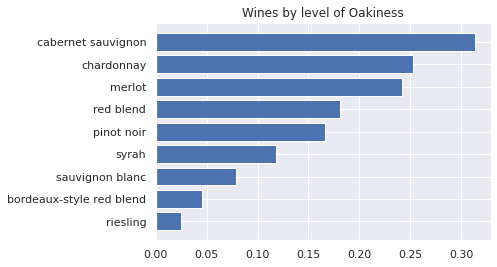

In [82]:
#Create horizontal bar plot of the ratios
plt.barh(oak_freq.index, oak_freq)

#Title the plot
plt.title('Wines by level of Oakiness')

#Show plot
plt.show()

Create some variables from filtered datasets, and use these to write a replicable expression that adapts based on new data.

In [83]:
#Count the number of rows in the two DataFrames
oak_num = len(oak_wines)
wine_num = len(wine_df)

#Select the wine with the highst percentage of oakiness
oak_wine = oak_freq.idxmax()

Using F strings.
Embed three variables into an fstring. Fstrings allow to insert variables into strings using curly brackets {}. Simply add an f as a prefix to our string and call it inside a print function.

We now have a simple and dynamic summary of our data!

In [84]:
print(f"There were {oak_num} mentions of 'oak' from amongst {wine_num} reviews. The most oaky wine was chardonnay.")

There were 723 mentions of 'oak' from amongst 4131 reviews. The most oaky wine was chardonnay.


In [85]:
oak_num = 834
wine_num = 5103
oak_wine = 'chardonnay'

print(f"There were {oak_num} mentions of 'oak' from amongst {wine_num} reviews. The most oaky wine was {oak_wine}.")

There were 834 mentions of 'oak' from amongst 5103 reviews. The most oaky wine was chardonnay.
